## Se importan Librerias

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Creando el dataframe

df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [13]:
# se eliminan las columnas categoricas
df.drop(['MODELYEAR','MAKE','MODEL','TRANSMISSION','VEHICLECLASS','FUELTYPE'], axis=1, inplace=True)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230


In [14]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


No hay valores nulos en el dataframe


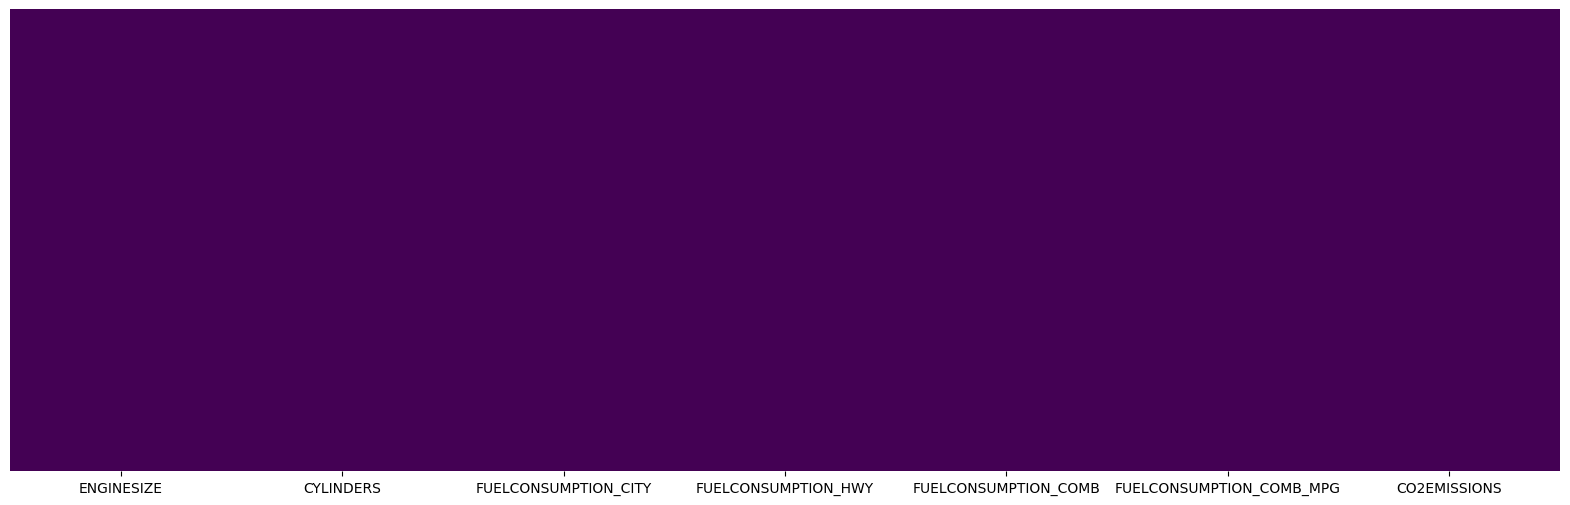

In [15]:
# Se Genera grafica para visualizar si hay valores nulos
# y dará un aviso si hay valores nulos

plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
if df.isnull().sum().sum() > 0:
    print("Hay valores nulos en el dataframe")
else:
    print("No hay valores nulos en el dataframe")

In [16]:
# Derterminando las variables donde buscaremos la relacion con CO2EMISSIONS
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [17]:
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.4,4,9.9,7.0,8.6
1,3.5,6,12.6,9.4,11.2
2,2.0,4,11.0,8.6,9.9
3,2.0,4,11.3,9.1,10.3
4,2.0,4,11.2,8.0,9.8
...,...,...,...,...,...
940,2.0,4,10.7,7.7,9.4
941,2.0,4,10.5,8.1,9.4
942,2.0,4,11.0,8.7,9.9
943,2.0,4,11.5,8.4,10.1


In [18]:
y

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

In [19]:
# se divide el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
# Se crea el modelo de regresion lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# Se obtienen los coeficientes

print('Intercept: ', lm.intercept_)
print('Coefficients: ', lm.coef_)

Intercept:  12.845974341403632
Coefficients:  [0.36929744 2.61362014 7.43679073 7.42934547 6.15620253]


In [22]:
# Se realiza la prediccion con el modelo de regresion lineal
predictions = lm.predict(X_test)
predictions

array([243.44662421, 305.09449359, 312.89732511, 250.25846491,
       268.65423558, 213.12320741, 261.27074267, 180.07598029,
       251.61478613, 284.50833808, 121.33553445, 264.44976783,
       241.81303614, 203.13190508, 263.68314245, 210.27654994,
       278.94531553, 206.04795489, 191.66543   , 293.57385425,
       324.48653041, 187.89565641, 378.34883787, 326.57478086,
       261.27074267, 220.17433263, 349.98136137, 360.49327526,
       170.45769802, 321.79057002, 304.972082  , 238.46154765,
       283.9473822 , 237.63761641, 216.70833228, 196.3045919 ,
       180.04128412, 361.73226908, 358.88648362, 236.2500136 ,
       232.95809311, 290.73789312, 327.06661738, 172.48681693,
       265.41189027, 210.27803899, 236.28129519, 325.22723138,
       354.39416868, 281.78973943, 164.15248545, 233.43314867,
       289.54134971, 276.84382618, 447.10570228, 221.00811678,
       181.77211446, 296.59545303, 169.71625253, 307.54581229,
       485.47560335, 285.99048454, 222.89442034, 136.38

In [23]:
# calculo de indicadores de la bondad de ajuste
from sklearn import metrics
from sklearn.metrics import r2_score

print("Valor de R2: ", r2_score(y_test, predictions))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test, predictions))
print("Error cuadratico medio: ", metrics.mean_squared_error(y_test, predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Valor de R2:  0.880856224149001
Error absoluto medio:  7.366543450200362
Error cuadratico medio:  441.6572416705394
Raiz del error cuadratico medio:  21.015642785090808


## Regresion Modelo Ridge

In [24]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
ridge_predictions = ridge.predict(X_test_scaled)

# Evaluando el modelo

print("Valor de R2: ", r2_score(y_test, ridge_predictions))
print("Error absoluto medio: ", mean_absolute_error(y_test, ridge_predictions))
print("Error cuadratico medio: ", mean_squared_error(y_test, ridge_predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, ridge_predictions)))

Valor de R2:  0.8808743184318761
Error absoluto medio:  7.366272523586951
Error cuadratico medio:  441.5901674905622
Raiz del error cuadratico medio:  21.01404690892647


## Definiendo el mejor alpha para Ridge

In [25]:
# Definiendo rango de valores para alpha

alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [26]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajusta el modelo RidgeCV
ridgecv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

# Probando el modelo RidgeCV para localizar el mejor valor de alpha
best_alpha = ridgecv.alpha_
print("Mejor valor de alpha: ", best_alpha)

Mejor valor de alpha:  1.0


In [27]:
# Prediciendo con el modelo RidgeCV con el mejor valor de alpha

ridgecv_predictions = ridgecv.predict(X_test_scaled)
print("Valor de R2: ", r2_score(y_test, ridgecv_predictions))
print("Error absoluto medio: ", mean_absolute_error(y_test, ridgecv_predictions))
print("Error cuadratico medio: ", mean_squared_error(y_test, ridgecv_predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, ridgecv_predictions)))

Valor de R2:  0.8810056081068774
Error absoluto medio:  7.3846497774091855
Error cuadratico medio:  441.10348629125673
Raiz del error cuadratico medio:  21.0024638147827


## Regresion Modelo Lasso

In [28]:
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_predictions = lasso.predict(X_test_scaled)

print("Valor de R2: ", r2_score(y_test, lasso_predictions))
print("Error absoluto medio: ", mean_absolute_error(y_test, lasso_predictions))
print("Error cuadratico medio: ", mean_squared_error(y_test, lasso_predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, lasso_predictions)))



Valor de R2:  0.8811352661215428
Error absoluto medio:  7.399728939288045
Error cuadratico medio:  440.6228535371866
Raiz del error cuadratico medio:  20.991018401620885


In [29]:
# Definiendo el mejor alpha posible para Lasso

alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [30]:
# Ajustar el modelo LassoCV

lassocv = LassoCV(alphas=alpha_range, cv=5)
lassocv.fit(X_train_scaled, y_train)

# Probando el modelo LassoCV para localizar el mejor valor de alpha
best_alpha = lassocv.alpha_
print("Mejor valor de alpha: ", best_alpha)

Mejor valor de alpha:  0.01


In [31]:
# Prediciendo con el modelo LassoCV con el mejor valor de alpha

lassocv_predictions = lassocv.predict(X_test_scaled)
print("Valor de R2: ", r2_score(y_test, lassocv_predictions))
print("Error absoluto medio: ", mean_absolute_error(y_test, lassocv_predictions))
print("Error cuadratico medio: ", mean_squared_error(y_test, lassocv_predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, lassocv_predictions)))


Valor de R2:  0.880812306688605
Error absoluto medio:  7.3897602903269535
Error cuadratico medio:  441.8200404762776
Raiz del error cuadratico medio:  21.01951570508411
